# Clustering Satellite Images

Our objective is to cluster pixels of a satellite image in order to find some insights.

In [4]:
# Modules

# File managing
import os
import re as regex

# Set working dir
os.chdir('/home/adriel_martins/Documents/projects/stats-img-processing')

# Visualization and Image Processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import biplot

# Data Manipulation
import pandas as pd

# Clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering

# Loading Images

We have 3 differente types of data. The original satellite image with many channel, and also the decomposed to only 2 PCA

In [5]:
original_img = pd.read_csv('data/output/array/cropped_img.csv').drop(columns=['index', 'Unnamed: 0'])
pca = pd.read_csv('data/output/array/pca_score.csv').drop(columns=['Unnamed: 0'])
pca_partial = pca.loc[:, ['PC1', 'PC2']]
fa = pd.read_csv('data/output/array/fa_score.csv').drop(columns=['Unnamed: 0'])

data_collection = {}
data_names = ['original_img', 'pca_full', 'pca_partial', 'fa']
for i, data in enumerate([original_img, pca, pca_partial, fa]):
    data_collection.update({data_names[i] : data})
    display(data.head())

,b1,b2,b3,b4,b5,b6,b7,b9,b10,b11
0,11797.0,10866.0,9907.0,9229.0,13254.0,11461.0,8732.0,5031.0,28591.0,25865.0
1,11810.0,10898.0,9933.0,9404.0,13029.0,12277.0,9517.0,5042.0,28564.0,25830.0
2,11858.0,10977.0,10068.0,9704.0,13292.0,13226.0,10404.0,5059.0,28580.0,25857.0
3,11842.0,10957.0,10053.0,9670.0,12832.0,12994.0,10243.0,5057.0,28643.0,25934.0
4,11845.0,10959.0,10050.0,9671.0,13192.0,12669.0,10048.0,5044.0,28729.0,26017.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.562415,0.609884,-1.899809,-0.078258,0.122494,0.413571,-0.028087,0.086845,-0.009167,0.033750
1,-1.208980,0.524218,-0.785919,0.026129,-0.267289,0.513689,0.005252,0.103105,-0.015590,0.011003
2,-0.411637,0.522821,0.911681,0.410430,-0.469799,0.513241,0.017641,0.132162,-0.009331,-0.002152
3,-0.570336,0.384522,0.748034,0.064857,-0.497465,0.493759,-0.013019,0.127144,0.029468,0.026811
4,-0.552427,0.491838,-0.590167,-0.033458,-0.210152,0.407038,-0.035174,0.174953,-0.023369,-0.000859


,PC1,PC2
0,-1.562415,0.609884
1,-1.208980,0.524218
2,-0.411637,0.522821
3,-0.570336,0.384522
4,-0.552427,0.491838


,F1,F2
0,-0.423327,-0.574774
1,-0.245363,-0.526909
2,0.122958,-0.489821
3,0.090803,-0.431901
4,-0.116046,-0.345796


# K-Means

In [6]:
def get_model_results(data, n_clusters=4):
    data = data.copy()

    kmeans = KMeans(n_clusters=n_clusters,
                    n_init = 50)
    model_results = data
    model_results['cluster'] = kmeans.fit_predict(data)
    
    return model_results

def biplot_decomposed_cluster(model_results, cols):
    fig, ax = plt.subplots()  # a figure with a single Axes
    ax.scatter(model_results[cols[0]], model_results[cols[1]],
                s=1, alpha=0.5,
                c=model_results['cluster'])
    ax.set_xlabel(cols[0])  # Add an x-label to the axes.
    ax.set_ylabel(cols[1])  # Add a y-label to the axes.

    return ax

def plot_clusters(cluster_series, colour='gray'):
    cluster_series = cluster_series.to_numpy().copy()
    cluster_series.shape = (500, -1)
    plt.imshow(cluster_series, cmap=colour)

0
1
2
3


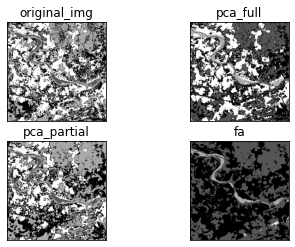

In [7]:
for index, (data_name, data) in enumerate(data_collection.items()):
    plt.subplot(2, 2, index + 1)
    print(index)

    plot_clusters(get_model_results(data)['cluster'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    plt.title(data_name)


plt.savefig('data/output/img/kmeans_cluster_img.png')

# PAM (Partition Around Medoids)

In [12]:
def get_model_results_kmedoids(data, n_clusters=4):
    data = data.copy()

    kmedoids = KMedoids(n_clusters=n_clusters,
                        method='pam',
                        init='k-medoids++')
    model_results = data
    model_results['cluster'] = kmedoids.fit_predict(data)
    
    return kmedoids.fit_predict(data)

In [13]:
for index, (data_name, data) in enumerate(data_collection.items()):
    data = data.values
        
    plot_clusters(get_model_results_kmedoids(data)['cluster'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    plt.title(data_name)
        
plt.savefig('data/output/img/kmedoid_cluster_img.png')

MemoryError: Unable to allocate 466. GiB for an array with shape (250000, 250000) and data type float64

# Agglomerative Hierarchical

In [10]:
def get_model_results_agghier(data, n_clusters=4):
    data = data.copy()

    kmedoids = KMedoids(n_clusters=n_clusters,
                        method='pam',
                        init='k-medoids++')
    model_results = data
    model_results['cluster'] = kmeans.fit_predict(data)
    
    return model_results

In [11]:
for index, (data_name, data) in enumerate(data_collection.items()):

    
#     plt.subplot(2, 2, index + 1)
#     print(index)

#     model_results = get_model_results_agghier(data)
#     plot_clusters(model_results['cluster'])
#     plt.tick_params(left = False, right = False , labelleft = False ,
#                     labelbottom = False, bottom = False)
#     plt.title(data_name)

plt.savefig('data/output/img/PAM_cluster_img.png')

IndentationError: expected an indented block (2844372854.py, line 13)